In [43]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import display

In [44]:
raports_dir = "../../raport"
results_dir = "../results"

In [66]:
def make_plot(results):

    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    fig, axs = plt.subplots(len(sizes), 1, figsize=(10, 12))

    fig.suptitle(
        results[0][2],
        x=0.45,
        y=0.95,
        horizontalalignment="left",
        verticalalignment="top",
        fontsize=15,
    )

    for i in range(len(sizes)):

        relevant_results = [result for result in results if result[3] == sizes[i]]

        axs[i].set_title(f"size {sizes[i]}")

        legend = []

        for result in relevant_results:
            averages = np.array(result[0]["average"])
            trajectory = averages.mean(axis=0)
            std = averages.std(axis=0)
            xs = np.arange(0, len(trajectory), step=1)
            axs[i].errorbar(
                xs,
                trajectory[xs],
                yerr=std[xs],
                errorevery=5,
                linestyle="dotted", # "dotted"
                linewidth=1,
                elinewidth=1,
                # capsize=1,
            )
            legend.append(result[1])

        axs[i].legend(legend, loc=1)
        axs[i].set_yscale("log")

    axs[i].set(xlabel="iterations", ylabel="fitness")

    fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

    fig.savefig(f"{raports_dir}/{results[0][2]}.pdf", bbox_inches="tight")
    
    plt.show()


## Plotting results

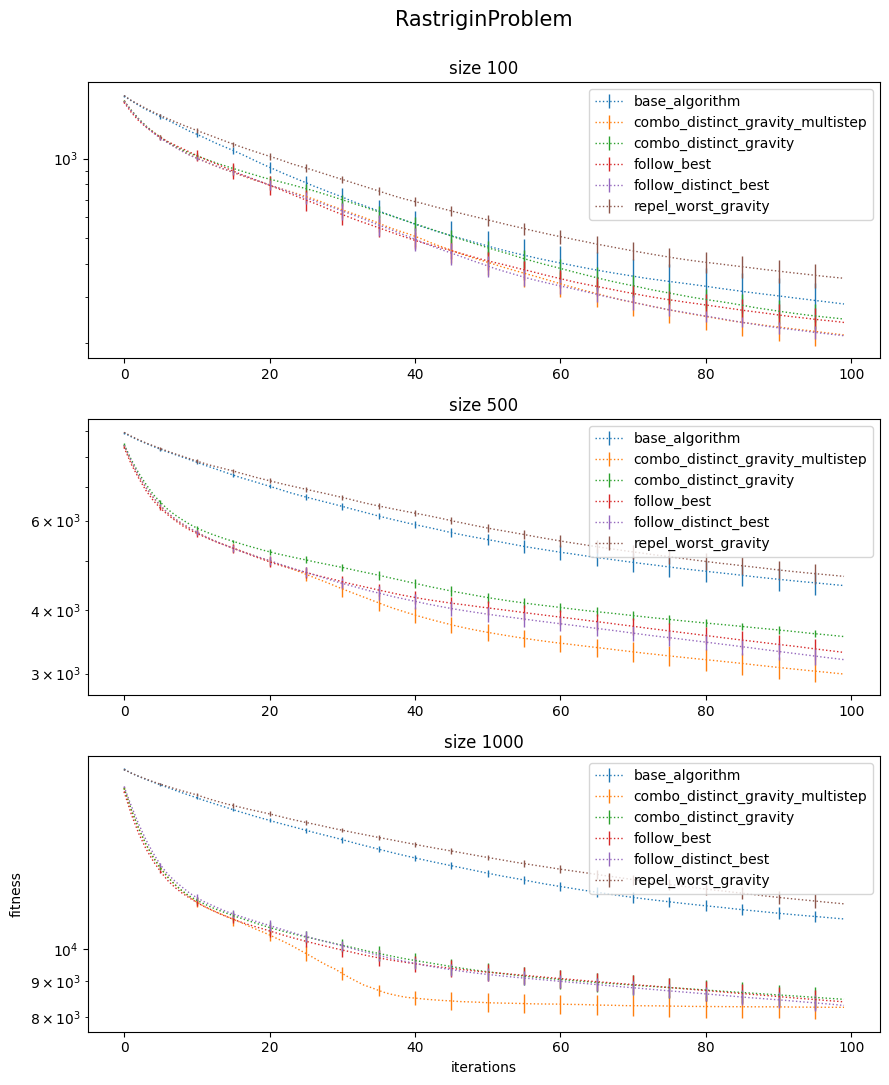

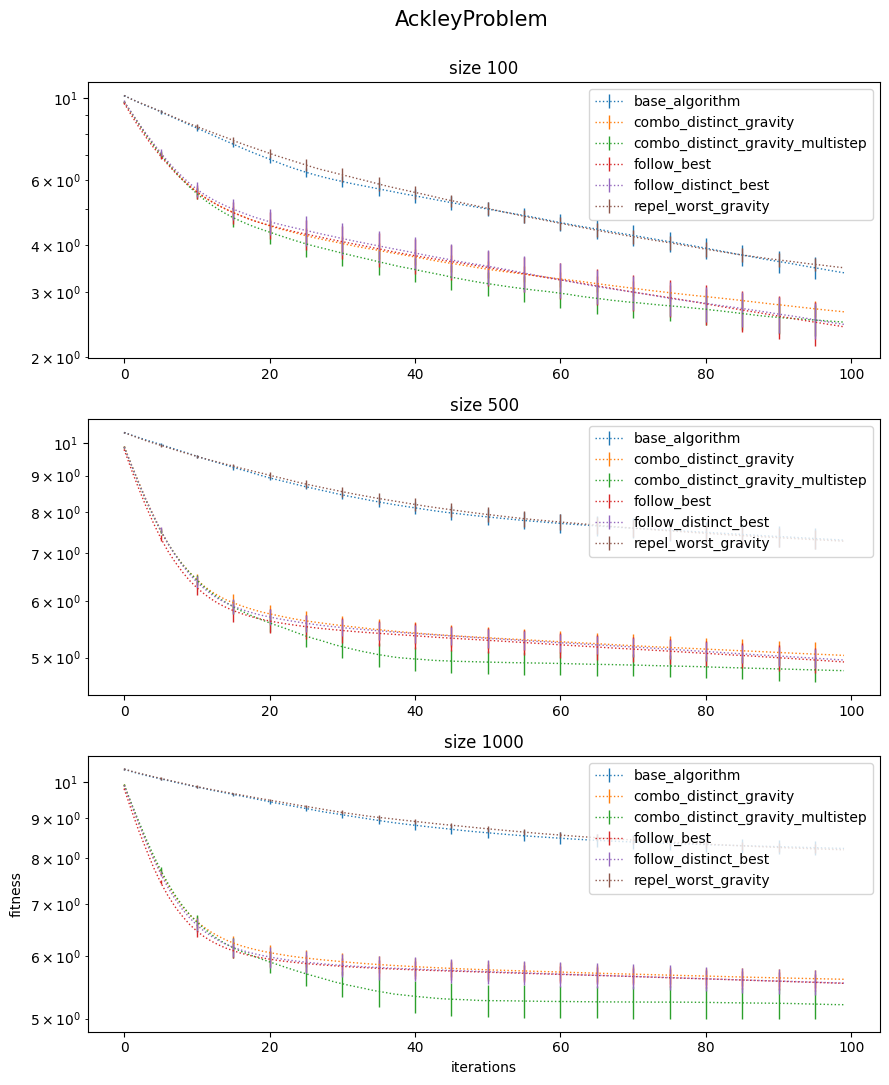

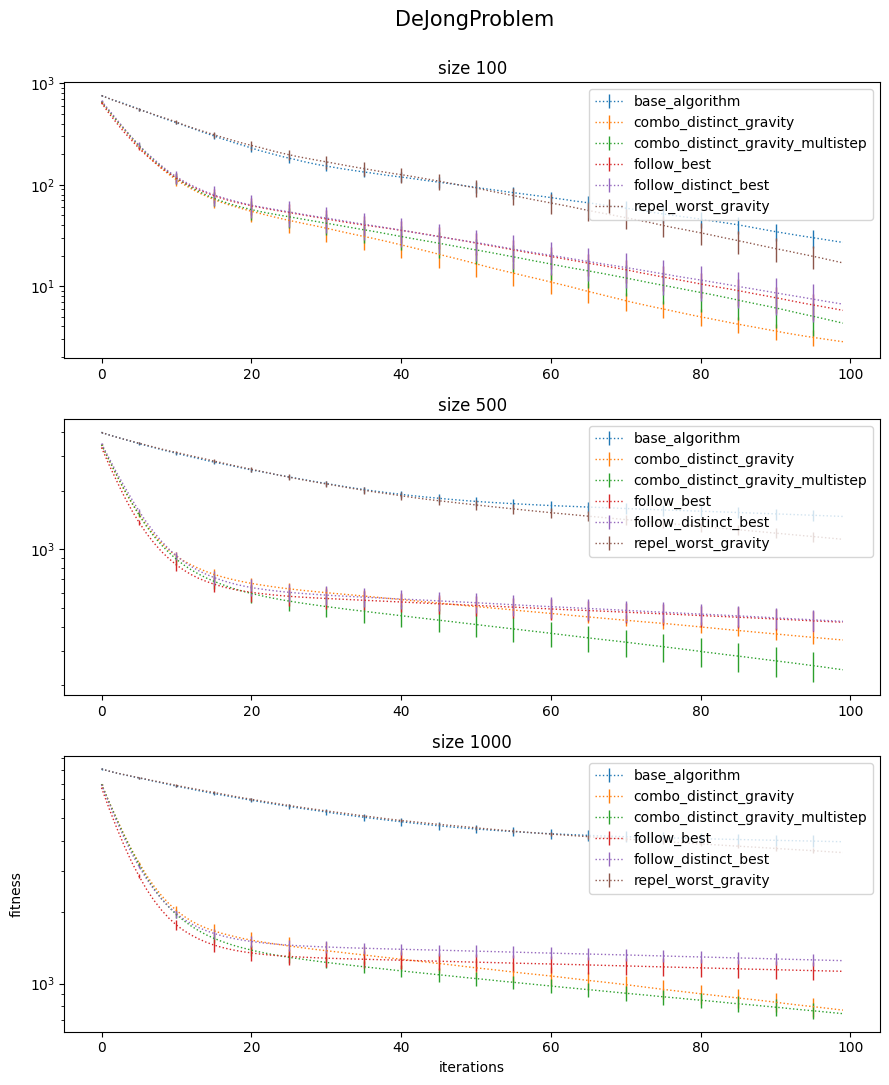

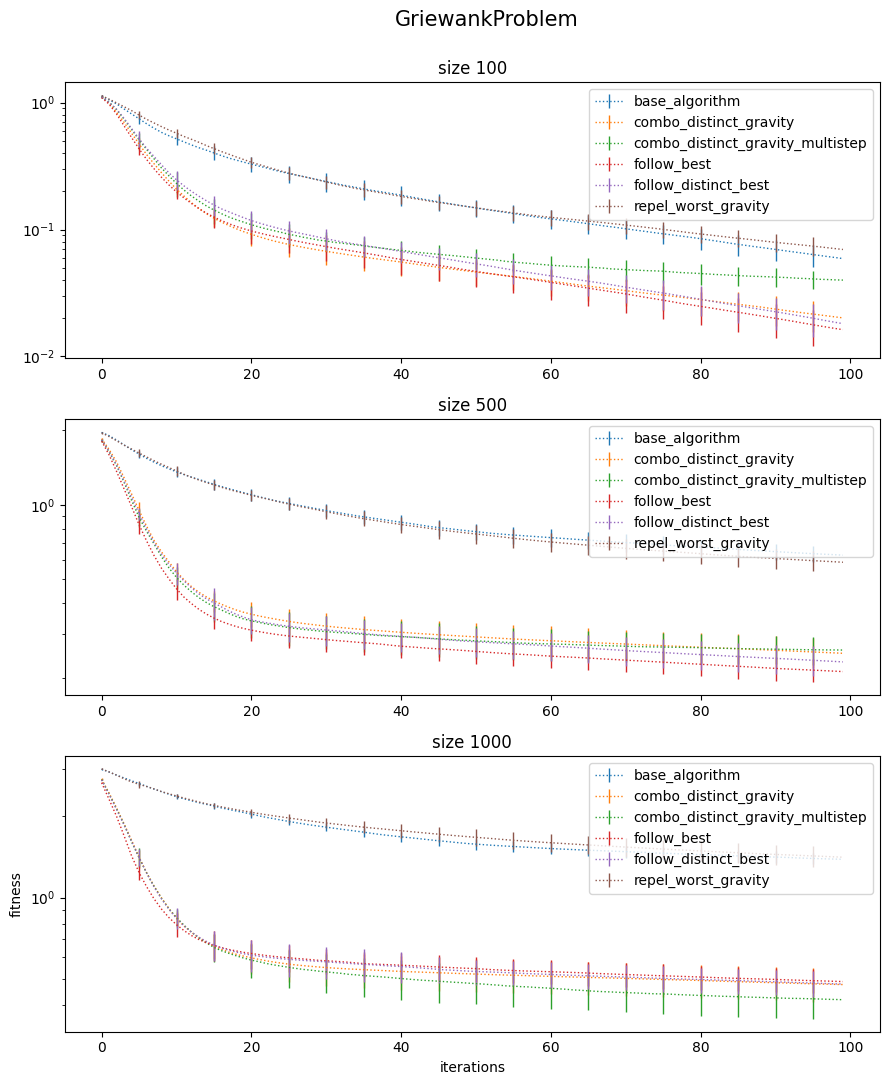

In [67]:
result_files = os.listdir(results_dir)

results = []

for filename in result_files:
    if os.path.isfile(f'{results_dir}/{filename}') and filename.endswith(".json"):
        with open(f'{results_dir}/{filename}', 'r') as file:
            result = json.loads(file.read())
            
            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])

# Comparing results

In [70]:
def compare_solutions(results):
    
    sizes = list(set([result[3] for result in results]))
    sizes.sort()
    
    df = {}
    
    for i in range(len(sizes)):
       
        relevant_results = [result for result in results if result[3] == sizes[i]]

        df_size = {}
        for result in relevant_results:
            final_population = np.array(result[0]["average"])[:,-1]
            df_size[result[1]] = {
                "mean": final_population.mean(),
                "std": final_population.std()
            }
        
        df[sizes[i]] = df_size
        
    return df

In [71]:
result_files = os.listdir(results_dir)

results = []

for filename in result_files:
    if os.path.isfile(f'{results_dir}/{filename}') and filename.endswith(".json"):
        with open(f'{results_dir}/{filename}','r') as file:
            result = json.loads(file.read())

            alg_name = re.search(r'(.*)_[^_]*_[^_]*\.json',filename).group(1)

            problem_name = re.search(r'.*_([^_]*)_[^_]*\.json',filename).group(1)

            problem_size = int(re.search(r'.*_[^_]*_([^_]*)\.json',filename).group(1))

            results.append((result, alg_name, problem_name, problem_size))
        
        
problems = set(map(lambda x: x[2], results))

df = {}

for problem in problems:
    df_problem = compare_solutions([result for result in results if result[2] == problem])
    df[problem] = df_problem

In [72]:
df_unpacked = {
    (problem_name, problem_size): {
        (" ".join([part.capitalize() for part in alg_name.split("_")]), metric): np.round(value, 5)
        for alg_name, alg_df in problem_size_df.items()
        for metric, value in alg_df.items()
    }
    for problem_name, problem_name_df in df.items()
    for problem_size, problem_size_df in problem_name_df.items()
}

results_df = pd.DataFrame.from_dict(df_unpacked).T
results_df

Base Algorithm             \
                                mean        std   
RastriginProblem 100       281.77198   47.09057   
                 500      4471.15849  235.14186   
                 1000    11040.39423  217.54917   
AckleyProblem    100         3.37491    0.22701   
                 500         7.30792    0.25897   
                 1000        8.23305    0.16985   
DeJongProblem    100        26.97622    5.57067   
                 500      1474.58571   98.63564   
                 1000     3977.16752  228.07420   
GriewankProblem  100         0.05899    0.01174   
                 500         0.62677    0.04563   
                 1000        1.38492    0.06979   

                      Combo Distinct Gravity Multistep             \
                                                  mean        std   
RastriginProblem 100                         215.03790   24.95604   
                 500                        2994.79498  149.64073   
                 1000                       8269.27007  322.01664   
AckleyProblem    100                           2.48415    0.24073   
                 500                           4.79414    0.20041   
                 1000                          5.20702    0.22054   
DeJongProblem    100                           4.30531    1.60242   
                 500                         240.76592   44.30179   
                 1000                        745.85560   59.77827   
GriewankProblem  100                           0.03991    0.00657   
                 500                           0.25913    0.03376   
                 1000                          0.41859    0.06692   

                      Combo Distinct Gravity            Follow Best  \
                                        mean        std        mean   
RastriginProblem 100               247.18840   27.87861   239.88389   
                 500              3549.06824   62.29688  3303.20912   
                 1000             8488.31157  296.61833  8418.42030   
AckleyProblem    100                 2.64847    0.13869     2.41265   
                 500                 5.03648    0.19958     4.93100   
                 1000                5.60999    0.14523     5.54400   
DeJongProblem    100                 2.82678    0.48697     5.75837   
                 500               342.39508   24.51301   422.31629   
                 1000              772.02788   71.86849  1126.22967   
GriewankProblem  100                 0.02009    0.00566     0.01623   
                 500                 0.25144    0.03529     0.21206   
                 1000                0.47626    0.06753     0.48858   

                                 Follow Distinct Best             \
                             std                 mean        std   
RastriginProblem 100    26.33045            213.75178   12.47158   
                 500   161.67600           3197.03604  126.73015   
                 1000  277.27048           8320.57188  210.37875   
AckleyProblem    100     0.33497              2.44935    0.28054   
                 500     0.20148              4.96231    0.15424   
                 1000    0.14519              5.54708    0.20317   
DeJongProblem    100     1.63147              6.63191    2.70832   
                 500    53.79250            426.64166   54.11351   
                 1000   99.92827           1249.48226   71.76500   
GriewankProblem  100     0.00522              0.01810    0.00525   
                 500     0.02285              0.23206    0.03204   
                 1000    0.04953              0.47835    0.05288   

                      Repel Worst Gravity             
                                     mean        std  
RastriginProblem 100            352.56992   37.46395  
                 500           4660.73030  213.85932  
                 1000         11599.90173  264.36266  
AckleyProblem    100              3.48171    0.12568  
                 500              7.28407    0.22853  
       

In [73]:
results_df.to_csv(f"{raports_dir}/results_table_1.csv")

In [74]:
import re

def split_alg_name(alg_name: str) -> str:
    return " ".join([part.capitalize() for part in alg_name.split("_")])

def parse_problem_name(problem_name: str) -> str:
    return " ".join(re.findall("[A-Z][^A-Z]*", problem_name)[:-1])

df_unpacked = [
    (parse_problem_name(problem_name), split_alg_name(alg_name), problem_size, metric, np.round(value, 5))
    for problem_name, problem_name_df in df.items()
    for problem_size, problem_size_df in problem_name_df.items()
    for alg_name, alg_df in problem_size_df.items()
    for metric, value in alg_df.items()
]

In [75]:
results_df = {}

for record in df_unpacked:
    problem_name, alg_name, problem_size, metric, value = record
    if (problem_name, alg_name) not in results_df.keys():
        results_df[(problem_name, alg_name)] = {}
    results_df[(problem_name, alg_name)][(problem_size, metric)] = value

results_df = pd.DataFrame.from_dict(results_df).T
results_df = results_df.sort_index()
results_df

100                   500   \
                                                 mean       std        mean   
Ackley    Base Algorithm                      3.37491   0.22701     7.30792   
          Combo Distinct Gravity              2.64847   0.13869     5.03648   
          Combo Distinct Gravity Multistep    2.48415   0.24073     4.79414   
          Follow Best                         2.41265   0.33497     4.93100   
          Follow Distinct Best                2.44935   0.28054     4.96231   
          Repel Worst Gravity                 3.48171   0.12568     7.28407   
De Jong   Base Algorithm                     26.97622   5.57067  1474.58571   
          Combo Distinct Gravity              2.82678   0.48697   342.39508   
          Combo Distinct Gravity Multistep    4.30531   1.60242   240.76592   
          Follow Best                         5.75837   1.63147   422.31629   
          Follow Distinct Best                6.63191   2.70832   426.64166   
          Repel Worst Gravity                16.93318   4.37035  1125.71550   
Griewank  Base Algorithm                      0.05899   0.01174     0.62677   
          Combo Distinct Gravity              0.02009   0.00566     0.25144   
          Combo Distinct Gravity Multistep    0.03991   0.00657     0.25913   
          Follow Best                         0.01623   0.00522     0.21206   
          Follow Distinct Best                0.01810   0.00525     0.23206   
          Repel Worst Gravity                 0.06958   0.01233     0.58662   
Rastrigin Base Algorithm                    281.77198  47.09057  4471.15849   
          Combo Distinct Gravity            247.18840  27.87861  3549.06824   
          Combo Distinct Gravity Multistep  215.03790  24.95604  2994.79498   
          Follow Best                       239.88389  26.33045  3303.20912   
          Follow Distinct Best              213.75178  12.47158  3197.03604   
          Repel Worst Gravity               352.56992  37.46395  4660.73030   

                                                              1000             
                                                  std         mean        std  
Ackley    Base Algorithm                      0.25897      8.23305    0.16985  
          Combo Distinct Gravity              0.19958      5.60999    0.14523  
          Combo Distinct Gravity Multistep    0.20041      5.20702    0.22054  
          Follow Best                         0.20148      5.54400    0.14519  
          Follow Distinct Best                0.15424      5.54708    0.20317  
          Repel Worst Gravity                 0.22853      8.20057    0.10774  
De Jong   Base Algorithm                     98.63564   3977.16752  228.07420  
          Combo Distinct Gravity             24.51301    772.02788   71.86849  
          Combo Distinct Gravity Multistep   44.30179    745.85560   59.77827  
          Follow Best                        53.79250   1126.22967   99.92827  
          Follow Distinct Best               54.11351   1249.48226   71.76500  
          Repel Worst Gravity                65.51437   3578.56759   77.48303  
Griewank  Base Algorithm                      0.04563      1.38492    0.06979  
          Combo Distinct Gravity              0.03529      0.47626    0.06753  
          Combo Distinct Gravity Multistep    0.03376      0.41859    0.06692  
          Follow Best                         0.02285      0.48858    0.04953  
          Follow Distinct Best                0.03204      0.47835    0.05288  
          Repel Worst Gravity                 0.05575      1.40984    0.12452  
Rastrigin Base Algorithm                    235.14186  11040.39423  217.54917  
          Combo Distinct Gravity             62.29688   8488.31157  296.61833  
          Combo Distinct Gravity Multistep  149.64073   8269.27007  322.01664  
          Follow Best                       161.67600   8418.42030  277.27048  
          Follow Distinct Best              126.73015   8320.57188  210.37

In [76]:
# Reordering algorithms

i_s = [0, 5, 3, 4, 1, 2]
n = 4
m = len(i_s)
indices = [b * m + i for b in range(n) for i in i_s] 
results_df = results_df.iloc[indices]
results_df

100                   500   \
                                                 mean       std        mean   
Ackley    Base Algorithm                      3.37491   0.22701     7.30792   
          Repel Worst Gravity                 3.48171   0.12568     7.28407   
          Follow Best                         2.41265   0.33497     4.93100   
          Follow Distinct Best                2.44935   0.28054     4.96231   
          Combo Distinct Gravity              2.64847   0.13869     5.03648   
          Combo Distinct Gravity Multistep    2.48415   0.24073     4.79414   
De Jong   Base Algorithm                     26.97622   5.57067  1474.58571   
          Repel Worst Gravity                16.93318   4.37035  1125.71550   
          Follow Best                         5.75837   1.63147   422.31629   
          Follow Distinct Best                6.63191   2.70832   426.64166   
          Combo Distinct Gravity              2.82678   0.48697   342.39508   
          Combo Distinct Gravity Multistep    4.30531   1.60242   240.76592   
Griewank  Base Algorithm                      0.05899   0.01174     0.62677   
          Repel Worst Gravity                 0.06958   0.01233     0.58662   
          Follow Best                         0.01623   0.00522     0.21206   
          Follow Distinct Best                0.01810   0.00525     0.23206   
          Combo Distinct Gravity              0.02009   0.00566     0.25144   
          Combo Distinct Gravity Multistep    0.03991   0.00657     0.25913   
Rastrigin Base Algorithm                    281.77198  47.09057  4471.15849   
          Repel Worst Gravity               352.56992  37.46395  4660.73030   
          Follow Best                       239.88389  26.33045  3303.20912   
          Follow Distinct Best              213.75178  12.47158  3197.03604   
          Combo Distinct Gravity            247.18840  27.87861  3549.06824   
          Combo Distinct Gravity Multistep  215.03790  24.95604  2994.79498   

                                                              1000             
                                                  std         mean        std  
Ackley    Base Algorithm                      0.25897      8.23305    0.16985  
          Repel Worst Gravity                 0.22853      8.20057    0.10774  
          Follow Best                         0.20148      5.54400    0.14519  
          Follow Distinct Best                0.15424      5.54708    0.20317  
          Combo Distinct Gravity              0.19958      5.60999    0.14523  
          Combo Distinct Gravity Multistep    0.20041      5.20702    0.22054  
De Jong   Base Algorithm                     98.63564   3977.16752  228.07420  
          Repel Worst Gravity                65.51437   3578.56759   77.48303  
          Follow Best                        53.79250   1126.22967   99.92827  
          Follow Distinct Best               54.11351   1249.48226   71.76500  
          Combo Distinct Gravity             24.51301    772.02788   71.86849  
          Combo Distinct Gravity Multistep   44.30179    745.85560   59.77827  
Griewank  Base Algorithm                      0.04563      1.38492    0.06979  
          Repel Worst Gravity                 0.05575      1.40984    0.12452  
          Follow Best                         0.02285      0.48858    0.04953  
          Follow Distinct Best                0.03204      0.47835    0.05288  
          Combo Distinct Gravity              0.03529      0.47626    0.06753  
          Combo Distinct Gravity Multistep    0.03376      0.41859    0.06692  
Rastrigin Base Algorithm                    235.14186  11040.39423  217.54917  
          Repel Worst Gravity               213.85932  11599.90173  264.36266  
          Follow Best                       161.67600   8418.42030  277.27048  
          Follow Distinct Best              126.73015   8320.57188  210.37875  
          Combo Distinct Gravity             62.29688   8488.31157  296.61

In [77]:
from pandas.io.formats.style import Styler

s = Styler(results_df, precision=2).set_table_styles(
    [
        {"selector": "toprule", "props": ":hline;"},
        {"selector": "midrule", "props": ":hline;"},
        {"selector": "bottomrule", "props": ":hline;"},
    ],
    overwrite=False,
)

s.to_latex(
    buf=f"{raports_dir}/results_table.tex",
    column_format="|l|l|r|r|r|r|r|r|",
    multicol_align="r|",
    clines="all;data",
    caption="This is a table.",
    label="tab:pandas",
)

In [78]:
results_df.to_csv(f"{raports_dir}/results_table.csv")